## Task
##### In this notebook, you will learn:

##### How to split the given data into Train and Test?
##### How to perform Data Preparation on -
###### 1.Categorical Columns - OneHotEncoding and LabelEncoding
###### 2.Numerical Columns - Standardization and Normalization
###### How to build ML models that can predict Price of a Diamond?

## Import the required libraries:

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data:

In [2]:
df=pd.read_csv(r'\Users\LENOVO\Downloads\diamonds (1).csv')

In [3]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
df.shape

(53940, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [15]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [12]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [19]:
df.color.nunique()

7

In [20]:
df.cut.nunique()

5

In [21]:
df.clarity.nunique()

8

## Machine Learning Problem
#### Build a system which can take features of diamond like carat, cut, color, clarity, x, y, z, etc.. and predicts the price of diamond.

#### Target Variable: ______

In [13]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [14]:
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


## Data Preparation:

### a. Identify the Target Variable and Splitting the Data into Train and Test

In [22]:
# Identifying the inputs (X) and output (y)

y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

In [23]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [24]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [25]:
# split into train and test for 70 &30 percent

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [26]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
29477,0.32,Ideal,F,VS1,61.3,56.0,4.40,4.44,2.71
52542,0.72,Very Good,I,VVS2,61.7,55.0,5.76,5.81,3.57
8725,0.38,Very Good,D,SI1,62.0,55.0,4.67,4.72,2.91
15577,1.00,Very Good,H,VVS2,62.6,56.0,6.36,6.39,3.99
19651,1.70,Premium,H,SI2,59.8,61.0,7.67,7.62,4.57


In [27]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(37758, 9) (37758,)
(16182, 9) (16182,)


In [30]:
# split into train and test for 75 &25 percent

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


In [31]:
# split into train and test for 80 &20 percent

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100)
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(43152, 9) (43152,)
(10788, 9) (10788,)


## b. Separating Categorical and Numerical Columns:

In [32]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
27187,2.01,Premium,I,SI1,60.2,59.0,8.18,8.12,4.91
3118,0.79,Ideal,H,VVS2,62.0,55.9,5.88,5.95,3.67
49238,0.64,Ideal,H,VVS1,61.1,55.0,5.58,5.61,3.43
53575,0.70,Ideal,E,VS2,62.7,56.0,5.73,5.63,3.56
29795,0.30,Premium,D,SI1,61.6,58.0,4.32,4.29,2.65


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 27187 to 38408
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   x        43152 non-null  float64
 7   y        43152 non-null  float64
 8   z        43152 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.3+ MB


In [33]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [34]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
27187,Premium,I,SI1
3118,Ideal,H,VVS2
49238,Ideal,H,VVS1
53575,Ideal,E,VS2
29795,Premium,D,SI1


In [35]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
27187,2.01,60.2,59.0,8.18,8.12,4.91
3118,0.79,62.0,55.9,5.88,5.95,3.67
49238,0.64,61.1,55.0,5.58,5.61,3.43
53575,0.70,62.7,56.0,5.73,5.63,3.56
29795,0.30,61.6,58.0,4.32,4.29,2.65


## c. Scaling the Numerical Features

In [37]:
X_train_num.head()

,carat,depth,table,x,y,z
27187,2.01,60.2,59.0,8.18,8.12,4.91
3118,0.79,62.0,55.9,5.88,5.95,3.67
49238,0.64,61.1,55.0,5.58,5.61,3.43
53575,0.70,62.7,56.0,5.73,5.63,3.56
29795,0.30,61.6,58.0,4.32,4.29,2.65


In [38]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,carat,depth,table,x,y,z
27187,2.552968,-1.084836,0.691895,2.180549,2.073410,1.969676
3118,-0.018674,0.169249,-0.693121,0.130733,0.185285,0.186833
49238,-0.334860,-0.457793,-1.095222,-0.136634,-0.110550,-0.158233
53575,-0.208386,0.656949,-0.648443,-0.002950,-0.093148,0.028678
29795,-1.051547,-0.109436,0.245116,-1.259576,-1.259087,-1.279699


In [39]:
X_train_num.describe()

,carat,depth,table,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.798859,61.757075,57.451372,5.733310,5.737054,3.540054
std,0.474410,1.435326,2.238268,1.122065,1.149302,0.695526
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000


In [42]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 6
Mean of each column: [ 0.79885915 61.75707499 57.45137189  5.73331039  5.73705413  3.54005423]
Std of each column: [0.47440497 1.43530908 2.23824184 1.12205226 1.14928833 0.69551824]


## d. Applying OneHotEncoding on Categorical Columns

In [44]:
X_train_cat['cut'].value_counts(normalize=True)

Ideal        0.399912
Premium      0.254727
Very Good    0.224323
Good         0.091514
Fair         0.029524
Name: cut, dtype: float64

In [45]:
X_train_cat['color'].value_counts(normalize=True)

G    0.208982
E    0.181753
F    0.178393
H    0.154060
D    0.124050
I    0.100714
J    0.052049
Name: color, dtype: float64

In [46]:
X_train_cat['clarity'].value_counts(normalize=True)

SI1     0.242561
VS2     0.227104
SI2     0.170259
VS1     0.152693
VVS2    0.094202
VVS1    0.067482
IF      0.032443
I1      0.013255
Name: clarity, dtype: float64

In [48]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53575,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [50]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27187,2.552968,-1.084836,0.691895,2.180549,2.073410,1.969676,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3118,-0.018674,0.169249,-0.693121,0.130733,0.185285,0.186833,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49238,-0.334860,-0.457793,-1.095222,-0.136634,-0.110550,-0.158233,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53575,-0.208386,0.656949,-0.648443,-0.002950,-0.093148,0.028678,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29795,-1.051547,-0.109436,0.245116,-1.259576,-1.259087,-1.279699,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## g. Preparing Test Data

In [51]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
52264,0.57,Ideal,E,VS2,61.5,57.0,5.35,5.32,3.28
21073,1.16,Ideal,G,VS1,61.5,55.0,6.75,6.81,4.17
42161,0.51,Ideal,G,SI1,63.2,58.0,5.05,5.08,3.20
35974,0.42,Ideal,F,VS1,60.6,56.0,4.83,4.87,2.94
7641,0.80,Premium,G,IF,62.6,58.0,5.89,5.93,3.70


In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10788 entries, 52264 to 2838
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10788 non-null  float64
 1   cut      10788 non-null  object 
 2   color    10788 non-null  object 
 3   clarity  10788 non-null  object 
 4   depth    10788 non-null  float64
 5   table    10788 non-null  float64
 6   x        10788 non-null  float64
 7   y        10788 non-null  float64
 8   z        10788 non-null  float64
dtypes: float64(6), object(3)
memory usage: 842.8+ KB


In [53]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [55]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()


,carat,depth,table,x,y,z
52264,0.57,61.5,57.0,5.35,5.32,3.28
21073,1.16,61.5,55.0,6.75,6.81,4.17
42161,0.51,63.2,58.0,5.05,5.08,3.20
35974,0.42,60.6,56.0,4.83,4.87,2.94
7641,0.80,62.6,58.0,5.89,5.93,3.70


In [59]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
52264,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21073,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42161,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35974,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7641,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,carat,depth,table,x,y,z
52264,-0.482413,-0.179108,-0.201664,-0.341615,-0.362880,-0.373900
21073,0.761250,-0.179108,-1.095222,0.906098,0.933574,0.905721
42161,-0.608887,1.005306,0.245116,-0.608983,-0.571705,-0.488922
35974,-0.798599,-0.806150,-0.648443,-0.805052,-0.754427,-0.862744
7641,0.002405,0.587278,0.245116,0.139646,0.167883,0.229966


In [61]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
52264,-0.482413,-0.179108,-0.201664,-0.341615,-0.362880,-0.373900,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21073,0.761250,-0.179108,-1.095222,0.906098,0.933574,0.905721,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42161,-0.608887,1.005306,0.245116,-0.608983,-0.571705,-0.488922,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35974,-0.798599,-0.806150,-0.648443,-0.805052,-0.754427,-0.862744,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7641,0.002405,0.587278,0.245116,0.139646,0.167883,0.229966,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear Regression:

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [63]:
y_test_pred = regressor.predict(X_test_transformed)

In [65]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491,2540.728140
21073,9248,7857.788528
42161,1284,1186.035727
35974,921,1767.527998
7641,4268,5195.134815


<AxesSubplot:xlabel='price', ylabel='Count'>

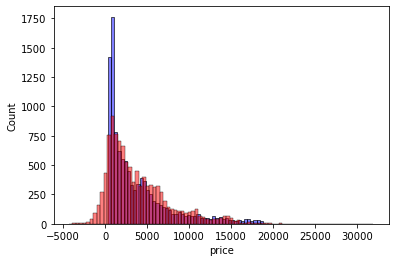

In [66]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [67]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  732.6185847774922
Mean Squared Error:  1284446.800081005
Root Mean Squared Error:  1133.3343725842806


## KNN Regression:

In [68]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [69]:
y_test_pred = regressor.predict(X_test_transformed)

In [75]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491,1949.0
21073,9248,8121.0
42161,1284,1237.0
35974,921,985.0
7641,4268,1651.0


<AxesSubplot:xlabel='price', ylabel='Count'>

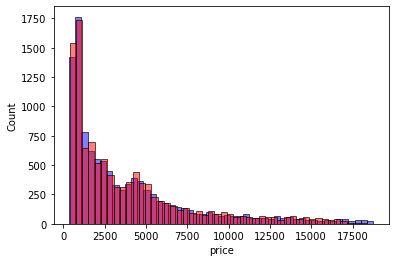

In [71]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [72]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  423.26136447905077
Mean Squared Error:  777540.6750834261
Root Mean Squared Error:  881.7826688495448


## Decision Tree Regression

In [73]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [74]:
y_test_pred = regressor.predict(X_test_transformed)

In [76]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491,1949.0
21073,9248,8121.0
42161,1284,1237.0
35974,921,985.0
7641,4268,1651.0


<AxesSubplot:xlabel='price', ylabel='Count'>

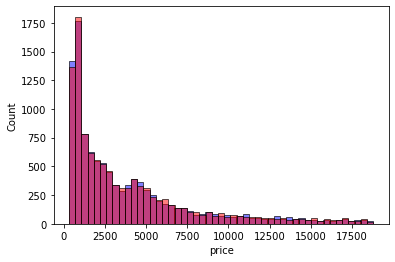

In [77]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [78]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  383.64530033370414
Mean Squared Error:  726410.9635011123
Root Mean Squared Error:  852.2974618647602


## Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [81]:
y_test_pred = regressor.predict(X_test_transformed)

In [82]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  294.2432083296549
Mean Squared Error:  419263.9741454697
Root Mean Squared Error:  647.5059645636245


### Conclusion:
#### Random Forest Regression is the best model for  diamond Price Prediction.
#### Because  Random Forest Regression mean absolute error is less compares to the other models.